In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import lmfit as lm
SEED = 35010732 # from random.org
np.random.seed(SEED)

In [203]:
#ODE's
#dP0 = -b*P0i*Ri + u*P1i
#dP1 = b*P0i*Ri - u*P1i - b*P1i*Ri + u*P2i
#dP2 = b*P1i*Ri - u*P2i
#dmRNA = mr*P0i + lr - mRNAi*g1
#dR = mRNAi*tr - Ri*g2 -b*P0i*Ri -b*P1i*Ri +u*P1i +u*P2i
#dG = mRNAi*tr - Gi*g2
def f(vec, t, lr, mr,tr,g1,g2,b,u):
    P0i=vec[0]      #Free GFP & TetR promoter
    P1i=vec[1]    #1 bound GFP & TetR promoter
    P2i=vec[2]     #2 bound GFP & TetR promoter
    mRNAi=vec[3]   #mRNA levels
    Ri=vec[4]     #TetR Protein levels
    Gi=vec[5]    #GFP protein levels
    vec = [P0i,P1i,P2i,mRNAi,Ri,Gi]
    return np.array([-b*P0i*Ri + u*P1i,
                    b*P0i*Ri - u*P1i - b*P1i*Ri + u*P2i,
                    b*P1i*Ri - u*P2i,
                    mr*P0i + lr - mRNAi*g1,
                    mRNAi*tr - Ri*g2 -b*P0i*Ri -b*P1i*Ri +u*P1i +u*P2i,
                    mRNAi*tr - Gi*g2])

In [204]:
t = np.linspace(0,50,1000)
#import Dataset remove measurements after 50 hrs
gfpi =pd.read_excel("12_8_20_comp_gfp_intensity.xlsx")
gfpi_data_cut = gfpi[0:150]
gfpi_data_cut = gfpi_data_cut.values.T
#gfpi_data.shape
gfpi_data_cut.shape
time = gfpi_data_cut[0].astype(np.double)
gfp_data = gfpi_data_cut[1:].astype(np.double)

Text(0, 0.5, 'integrated intensity')

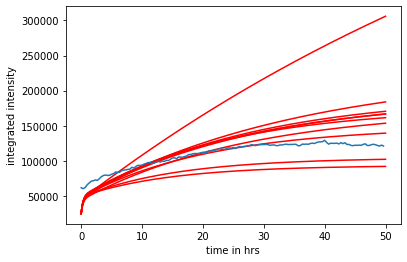

In [207]:
for i in range(10):
    #Parameters
    lr = np.random.normal(loc= 605 , scale = 30) #mRNA leakage term ogv =2
    mr = np.random.normal(loc=625 , scale = 1) #Max mRNA production rate ogv=200
    tr = np.random.normal(loc=38 , scale = 0.005) #Translation rate
    g1 = np.random.normal(loc= 3.35, scale = 0.001) #mRNA degradation/dilution rate
    g2 = np.random.normal(loc=0.0485 , scale = 0.015) #Protein degradation/dilution rate
    b = np.random.normal(loc=0.2 , scale = 0.0035) #TetR binding to TetR promoter
    u = np.random.normal(loc=20.8 , scale =0.5) #TetR binding to TetR promoter
    #Initial Conditions
    mRNA0= np.random.normal(loc=2200,scale=200)     #TetR mrna  
    GFP10= np.random.normal(loc=25000,scale=250)     #GFP
    TetR0= np.random.normal(loc=100,scale=10)        #unbound/active TetR protein ogv=0
    P00= np.random.normal(loc=0,scale=10)          #0 TetR bound to TetR promoter
    P10= np.random.normal(loc=0,scale=10)           #1 TetR bound to TetR promoter
    P20= np.random.normal(loc=0,scale=200)         #2 TetR bound to TetR promoter
    vec0 = [P00,P10,P20,mRNA0,TetR0,GFP10]
    x1, infodict = odeint(f,vec0,t, args = (lr, mr, tr, g1, g2, b, u), full_output=True)
    p0, p1,p2,mRNA,R,G = x1.T
    plt.plot(t, G,"-r")
for data in gfp_data[:1]:
    plt.plot(time, data)
plt.xlabel("time in hrs")
plt.ylabel("integrated intensity")